#Problem Statement
Stock market playing the major role in the world
country's economy is completely based on the
company's business and the investor's belief.

Each and every investor plays a vital role in the
upliftment of their country's economy.
Beginners should have a proper guidance and
assurance while trading the stocks for the first
time. Not having such guidance would be fatal
for the investors as well as the economy as a
whole.

Our aim is to provide such assistance to the beginner investors.

#Dataset
The training dataset used is from Yahoo Finance which is being used to train the models used in this project.

https://finance.yahoo.com/quote/HFCL.NS?p=HFCL.NS&.tsrc=fin-srch

# Python packages
### Numpy

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

__________________________________________

### Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

__________________________________________


### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like wxPython, Qt, Tkinter.

__________________________________________


### Seaborn

Seaborn is a Python data visualization library based on matplotlib. Gives more attractive graphs than matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

__________________________________________


### Scikit-Learn

Scikit-Learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.



# Importing Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVR
from sklearn import metrics 
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [173]:
# Read data into a DataFrame
data = pd.read_csv('HFCL.NS.csv', index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-28,68.750000,74.250000,67.099998,72.750000,72.576210,16868265
2022-03-02,71.500000,73.400002,70.449997,70.949997,70.780510,11965418
2022-03-03,72.000000,73.099998,70.849998,71.199997,71.029915,6997355
2022-03-04,70.400002,71.199997,69.349998,69.949997,69.782898,7589656
2022-03-07,68.000000,69.199997,67.500000,68.300003,68.136848,6149955
...,...,...,...,...,...,...
2023-02-20,68.000000,68.250000,67.000000,67.250000,67.250000,3014273
2023-02-21,67.250000,67.750000,66.449997,66.699997,66.699997,3590096
2023-02-22,66.300003,66.699997,63.549999,64.599998,64.599998,4011250


In [174]:
# Check the data size
data.shape

(248, 6)

In [175]:
# Decribe the dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,72.090928,73.571573,70.740927,71.865121,71.771667,8.977016e+06
std,7.286206,7.406903,7.280651,7.269725,7.292840,7.145697e+06
min,53.599998,54.900002,51.549999,53.000000,52.873390,2.198796e+06
25%,67.362502,68.950001,65.800003,67.099998,66.939705,5.083084e+06
50%,73.075001,74.100003,71.825001,72.800003,72.725853,6.842915e+06
75%,77.724998,79.612499,76.562502,77.387498,77.323648,1.043229e+07
max,86.000000,88.800003,85.099998,85.550003,85.550003,5.422772e+07


In [176]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2022-02-28 to 2023-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6+ KB


# Exploratory Data Analysis

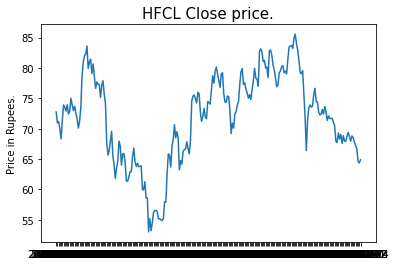

In [177]:
# Analysing how prices of the stock have moved over the period of time.plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('HFCL Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()

The prices of reliance stocks are showing an volatile trend as depicted by the plot of the closing price of the stocks.

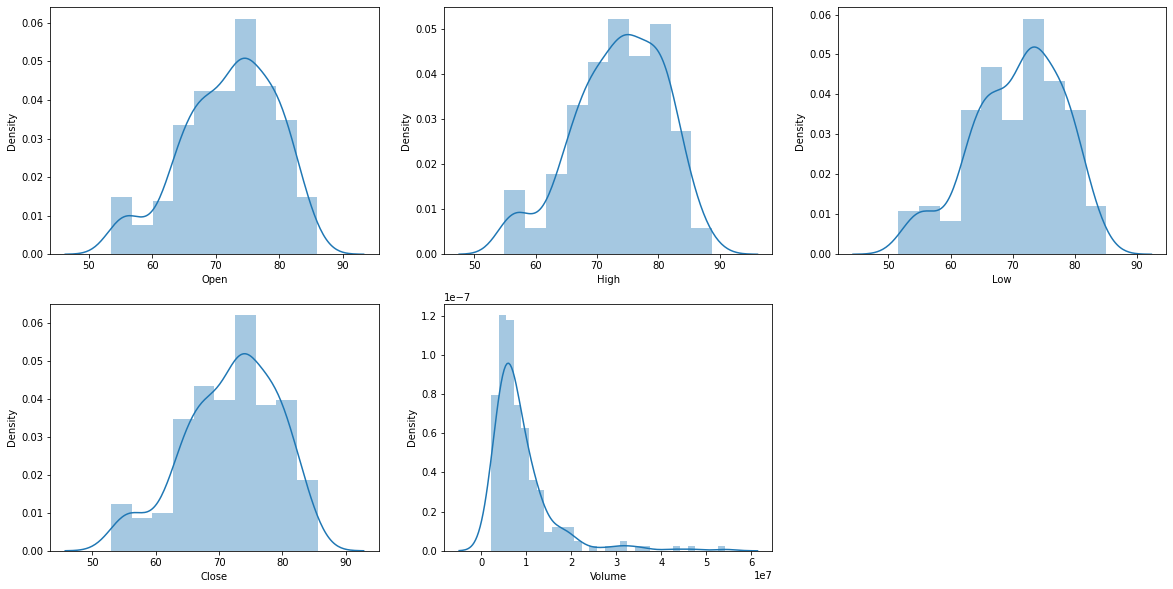

In [178]:
# Visualize the distribution for each varieble
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

In the distribution plot of OHLC data, we can see two peak which means the data has varied significantly in two regions.

And the Volume data is left-skewed.

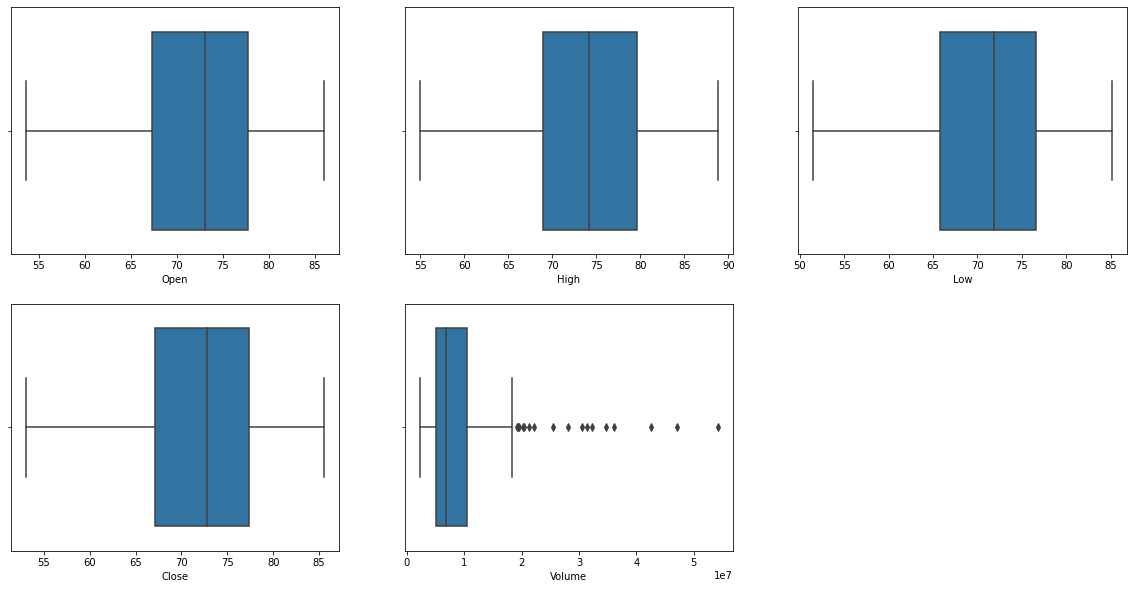

In [179]:
# Boxplot for the distribution of each variable
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [180]:
# Target feature which is a signal whether to buy or not we will train our model to predict this only. 
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

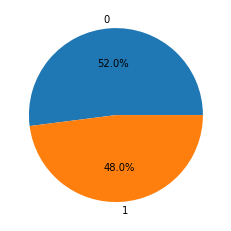

In [181]:
# Using the following pie chart to check whether the target is balanced or not.
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

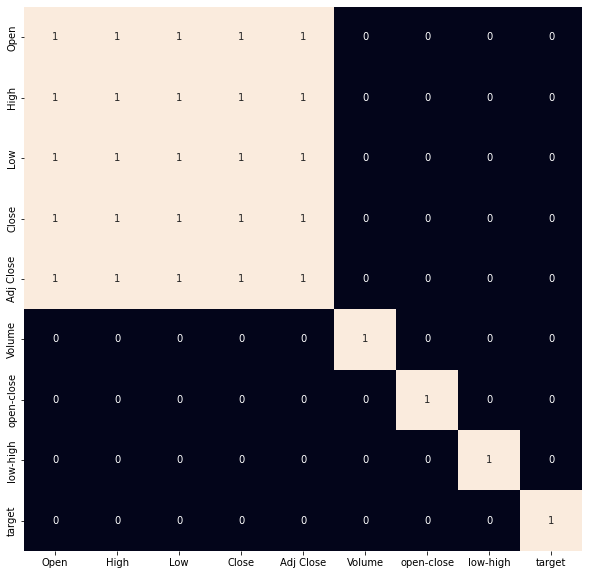

In [182]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Training and Testing of the stock data

In [183]:
# Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [184]:
X_train = train_data.drop('Close', axis=1).values
y_train = train_data['Close'].values
X_test = test_data.drop('Close', axis=1).values
y_test = test_data['Close'].values

# Model Deployment and Evaluation

In [185]:
# Creating the SVM model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [186]:
# Generating predictions for the test set
y_pred = model.predict(X_test)

We then generate predictions for the test set using the make_future_dataframe() method and the predict() method.

In [187]:
# Calculating the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE score: %.2f%%' % (mape * 100))

MAPE score: 3.92%


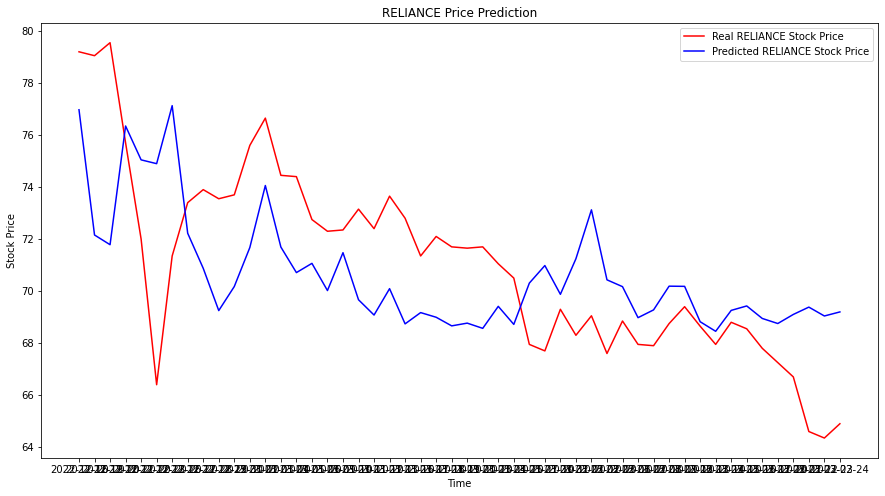

In [188]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 8))
axes.xaxis_date()

axes.plot(data[len(data)-len(y_test):].index, y_test, color = 'red', label = 'Real HFCL Stock Price')
axes.plot(data[len(data)-len(y_test):].index, y_pred, color = 'blue', label = 'Predicted HFCL Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('HFCL Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()